# Задание 5
Реализовать и использовать неявную схему метода Эйлера решения задачи Коши для линейной системы ОДУ. Построить график решения.

## Теория

Для понимания темы нужно прочитать прошлую задачу.
Неявный (обратный) метод Эйлера задается формулой:
$$y_{n+1}=y_n+hf(t_{n+1},y_{n+1}),$$
т.е. отличие от явного метода в том, что мы вычисляем значение $f(t,y)$ в следующей точке $t_{n+1},~y_{n+1}$. Это может потребовать вычисления ''руками'', но здесь я воспользуюсь fsolve из scipy.optimize

## Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### Реализуем метод

In [2]:
def implicit_euler_method_system(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t)-1):
        func = lambda y_next : y_next - y[i] - (t[i+1]-t[i])*np.array(f(y_next, t[i+1]))
        y[i+1] = fsolve(func, y[i])
    return y

Возьмем для примера систему:
$$\begin{matrix}
\frac{dy_1}{dt} = y_1-4y_2, & \frac{dy_2}{dt} = y_1+y_2
\end{matrix}$$
с начальными условиями $y_1(0) = 2,~y_2(0) = 3$ на интервале $[0,2]$

In [3]:
# Определение функции
def f(y, t):
    return [y[0] - 4*y[1], y[0] + y[1]]

# Начальное значение
y0 = [2, 3]

# Массив времени
t = np.linspace(0, 2, 40)

# Решение с помощью метода Эйлера
y = implicit_euler_method_system(f, y0, t)

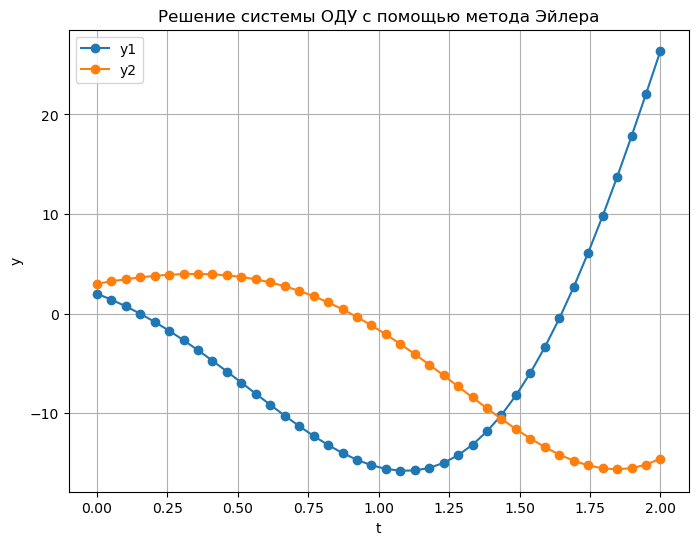

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(t, y[:, 0], label='y1', marker='o')
ax.plot(t, y[:, 1], label='y2', marker='o')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Решение системы ОДУ с помощью метода Эйлера')
ax.grid()
ax.legend()
plt.show()

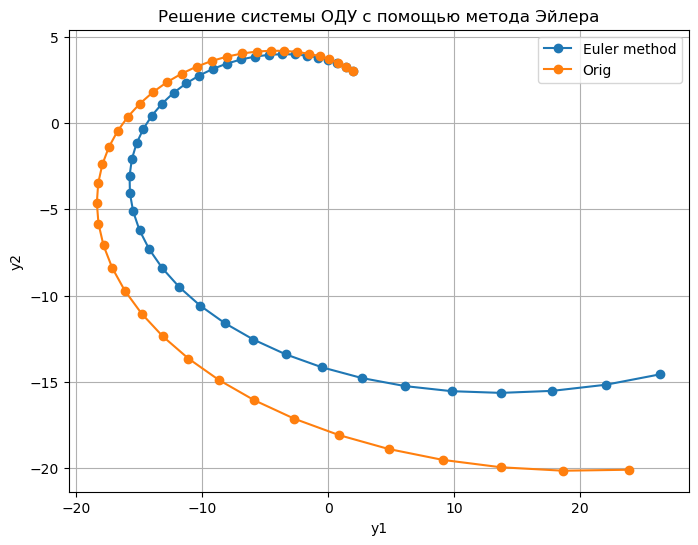

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(y[:,0], y[:,1], marker='o', label = 'Euler method')
ax.plot(-2*np.exp(t)+4*np.exp(t)*np.cos(t)**2-12*np.exp(t)*np.cos(t)*np.sin(t),
        -3*np.exp(t)+6*np.exp(t)*np.cos(t)**2+2*np.exp(t)*np.cos(t)*np.sin(t),
        marker='o', label = 'Orig')
ax.set_xlabel('y1')
ax.set_ylabel('y2')
ax.set_title('Решение системы ОДУ с помощью метода Эйлера')
ax.legend()
ax.grid()
plt.show()